<a href="https://colab.research.google.com/github/MathewS424/PyTorch-Tutorial/blob/main/20_Card_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BUILD YOUR FIRST PYTORCH MODEL IN MINUTES - PLAYINGCARD CLASSIFICATION**

**LINK - [https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier](https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier)**

[YouTube Tutorial!](https://youtu.be/tHL5STNJKag?si=MtkGcDz3Gf8Qb5jB)

Train Your Very First Pytorch Model!¶
Let's learn through doing.

In this notebook we will create an image classifier to detect playing cards.

We will tackle this problem in 3 parts:

  Pytorch Dataset  
  Pytorch Model  
  Pytorch Training Loop

Almost every pytorch model training pipeline meets this paradigm.

In [2]:
pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm  #import timm is a Python command used to import the timm library, which stands for "PyTorch Image Models"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from tqdm.notebook import tqdm

In [4]:
print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System Version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
PyTorch version 2.3.1+cu121
Torchvision version 0.18.1+cu121
Numpy version 1.26.4
Pandas version 2.1.4


#**Step 1.** **Pytorch Dataset (and Dataloader)**    
Would you learn how to bake a cake without first having the ingredients? No.

The same thing can be said for training a pytorch model without first having the dataset setup correctly.

This is why datasets are important:

  It's an organized way to structure how the data and labels are loaded into the model.

We can then wrap the dataset in a dataloader and pytorch will handle batching the shuffling the data for us when training the model!

In [5]:
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transform=None):
    self.data = ImageFolder(data_dir, transform=transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

  @property
  def classes(self):
    return self.data.classes

In [6]:
# dataset = PlayingCardDataset(
#     data_dir='/kaggle/input/cards-image-datasetclassification/train'
# )  # for kaggle notebook

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
zip_path = '/content/drive/My Drive/Card_datasets/archive.zip'


In [9]:
import os

extract_path = '/content/playing_card_dataset'
os.makedirs(extract_path, exist_ok=True)


In [10]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")


Dataset extracted to /content/playing_card_dataset


In [11]:
import os

# List the files in the extracted directory
extracted_files = os.listdir(extract_path)
print("Files in extracted directory:", extracted_files)


Files in extracted directory: ['valid', '14card types-14-(200 X 200)-94.61.h5', 'cards.csv', 'train', 'test', '53cards-53-(200 X 200)-100.00.h5']


In [12]:
dataset = PlayingCardDataset(
    data_dir='/content/playing_card_dataset'
)

In [13]:
len(dataset)   # full datasets len

8154

In [14]:
dataset[5]  # (image, label)

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

0


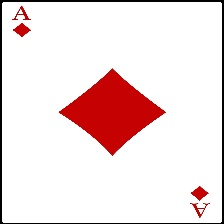

In [15]:
image, label = dataset[5]
print(label)
image

In [16]:
dataset = PlayingCardDataset(
    data_dir='/content/playing_card_dataset/train'
)

In [17]:
len(dataset)      # train datasets len

7624

In [37]:
dataset = PlayingCardDataset(
    data_dir='/content/playing_card_dataset/test'
)

In [38]:
len(dataset)      # test datasets len

265

In [18]:
# Get a dictionary associating target values with folder names
data_dir = '/content/playing_card_dataset/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [19]:
# Ensure all images in datasets are same size
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])  # Resize all images to 128x128 pixels and convert it to tensor

data_dir = '/content/playing_card_dataset/train'
dataset = PlayingCardDataset(data_dir, transform)


In [20]:
dataset[100]

(tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
          [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
          ...,
          [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
          [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],
 
         [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
          [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
          [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
          ...,
          [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
          [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
          [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],
 
         [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
          [0.0118, 0.0196, 0.3137,  ...,

In [21]:
image, label = dataset[100]
print(label)
print(image.shape) # output:torch.Size([3, 128, 128]) 3 is channel red , green, blue
image   # No picture since its converted to tensor

0
torch.Size([3, 128, 128])


tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
         [0.0235, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
         ...,
         [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
         [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
         [0.0078, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
         ...,
         [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
         [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0039]],

        [[0.0196, 0.0196, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
         [0.0118, 0.0196, 0.3137,  ..., 0.2196, 0.0235, 0.

In [22]:
# iterate over dataset
for image, label in dataset:
    break
print(label)
image

0


tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0784, 0.0824, 0.0745,  ..., 1.0000, 1.0000, 1.0000],
         [0.7490, 0.7451, 0.7412,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.0745, 0.0784, 0.0706,  ..., 1.0000, 1.0000, 1.0000],
         [0.7451, 0.7451, 0.7373,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

**Dataloaders**      
Batching our dataset
It's faster to train the model in batches instead of one at a time.                       
**Shuffle = True for training and False for Testing**

In [23]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [24]:
for image, label in dataloader:
    break
image.shape, label.shape  # (torch.Size([32, 3, 128, 128]), torch.Size([32])) 32 batches
print(label)
print(image)

tensor([15,  6, 26, 33, 48, 23,  3, 15, 35, 19, 44, 33, 15, 50, 50,  8, 15, 29,
        32, 36, 45, 50, 10, 37, 47, 26, 21, 26, 49, 30, 33,  3])
tensor([[[[0.9373, 0.9137, 0.8471,  ..., 0.9961, 0.9882, 0.9843],
          [0.9216, 0.8510, 0.9216,  ..., 1.0000, 0.9922, 0.9882],
          [0.8745, 0.8902, 0.9765,  ..., 0.9961, 0.9961, 1.0000],
          ...,
          [0.9412, 0.8588, 0.9765,  ..., 1.0000, 1.0000, 0.9961],
          [0.9765, 0.8706, 0.8863,  ..., 1.0000, 0.9961, 0.9961],
          [0.9882, 0.9529, 0.8431,  ..., 0.9961, 0.9882, 0.9843]],

         [[0.9451, 0.9176, 0.8510,  ..., 0.9961, 0.9922, 0.9882],
          [0.9294, 0.8549, 0.9255,  ..., 1.0000, 0.9961, 0.9922],
          [0.8824, 0.8941, 0.9804,  ..., 0.9961, 0.9961, 1.0000],
          ...,
          [0.9373, 0.8549, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
          [0.9765, 0.8667, 0.8902,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9490, 0.8431,  ..., 0.9961, 0.9922, 0.9882]],

         [[0.9333, 0.8980, 0.



**### Understanding the `DataLoader` and Output Shapes**

1. **`DataLoader` Creation:**

   ```python
   dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
   ```

   - **`dataset`**: This is the dataset you created using `PlayingCardDataset`.
   - **`batch_size=32`**: This means that each batch will contain 32 images and their corresponding labels.
   - **`shuffle=True`**: This means the dataset will be shuffled before being divided into batches. This helps in training by ensuring the model doesn’t see the images in the same order every epoch.

2. **Iterating Through the DataLoader:**

   ```python
   for image, label in dataloader:
       break
   ```

   - This loop gets one batch of images and labels from the `dataloader`.
   - `break` exits the loop after the first batch is retrieved, so you’re only looking at the first batch.

3. **Understanding the Output Shapes:**

   ```python
   image.shape, label.shape
   ```

   The shapes are:

   - **`image.shape`**: `torch.Size([32, 3, 128, 128])`
     - **32**: This is the batch size, so there are 32 images in the batch.
     - **3**: This is the number of color channels (RGB) for each image.
     - **128x128**: This is the height and width of each image after resizing.

   - **`label.shape`**: `torch.Size([32])`
     - **32**: This is the number of labels, corresponding to the 32 images in the batch. Each label is a single integer representing the class of the corresponding image.

### Summary

- The `DataLoader` divides the dataset into batches. Each batch has a size of 32 images and their corresponding labels, as specified by `batch_size=32`.
- **`image.shape`** indicates that each batch contains 32 images, where each image has 3 color channels and is of size 128x128 pixels.
- **`label.shape`** indicates that there are 32 labels, one for each image in the batch.

So yes, each batch from the `DataLoader` contains 32 images, and each image has the dimensions `(3, 128, 128)`.

# Step 2. Pytorch Model
Pytorch datasets have a structured way of organizing your data, pytorch models follow a similar paradigm.

We could create the model from scratch defining each layer.
                               
However for tasks like image classification, many of the state of the art architectures are readily available and we can import them from packages like timm.                                  
Understanding the pytorch model is all about understanding the shape the data is at each layer, and the main one we need to modify for a task is the final layer. Here we have 53 targets, so we will modify the last layer for this.

In [25]:
class SimpleCardClassifier(nn.Module):
  def __init__(self, num_classes=53):
    super(SimpleCardClassifier, self).__init__()
    # Where we define all the parts of the model
    self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1])

    enet_out_size = 1280
    # Make a classifier
    self.classifier = nn.Linear(enet_out_size, num_classes)

  def forward(self, x):
    # Connect these parts and return output
    x = self.features(x)
    x = self.classifier(x)
    return x

In [26]:
model = SimpleCardClassifier(num_classes=53)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [27]:
print(str(model)[:500])     # Printing only beginning of model

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [28]:
example_out = model(image) # check input , the model receive is of same format if no error model accept same format of image
example_out.shape  # [batch_size, num_classes]

torch.Size([32, 53])

# Understanding `[:-1]`

The code in question is:

```python
self.features = nn.Sequential(*list(self.base_model.children())[:-1])
```

1. **`self.base_model.children()`**:
   - This retrieves the layers (or "children") of the model `self.base_model`. In this case, `self.base_model` is the EfficientNet-B0 model.

2. **`list(self.base_model.children())`**:
   - This converts the layers into a list. Each element in this list corresponds to a layer or a block of layers in the EfficientNet-B0 model.

3. **`[:-1]`**:
   - This is Python slicing syntax. `[:-1]` means "all elements except the last one."
   - So, when you do `list(self.base_model.children())[:-1]`, you're taking all the layers of the model **except the last one**.

   The last layer in many pre-trained models (like EfficientNet-B0) is typically a fully connected layer that is used for classification based on the dataset it was originally trained on (e.g., ImageNet with 1000 classes). Since you're creating a custom classifier, you don't want to use this last layer.

### **Why exclude the last layer?**

In pre-trained models, the last layer (often a fully connected layer) is specifically designed for the classification task that the model was originally trained on (e.g., classifying 1000 different categories in ImageNet). However, when you're using this model for your own task (classifying 53 types of playing cards), you need to replace this layer with one that suits your specific task.

So, by excluding the last layer, you're keeping all the useful feature extraction layers and removing the part that's specific to the original task. You then replace it with your custom classifier that outputs 53 classes.

### **Order of Operations in the Model**

1. **Model Creation**:
   - You first create the EfficientNet-B0 model using `timm.create_model('efficientnet_b0', pretrained=True)`.
   - This model includes a sequence of layers designed to extract features from images and then classify them based on these features.

2. **Feature Extraction Setup**:
   - `self.features = nn.Sequential(*list(self.base_model.children())[:-1])` creates a feature extractor by taking all the layers of EfficientNet-B0 except the last one. This part of the model will be used to convert input images into a feature representation (a tensor of features).
   - **`nn.Sequential`**: This wraps the layers into a `Sequential` container so they are executed one after the other, in the same order they appear in the list.

3. **Custom Classifier**:
   - You define `self.classifier = nn.Linear(enet_out_size, num_classes)` to replace the original classifier with one suited to your task.
   - The output of `self.features(x)` is passed into `self.classifier(x)`, where `x` is the image tensor after it has been processed by the feature extractor.

4. **Forward Pass**:
   - During the forward pass, the input image first goes through `self.features(x)`, which extracts features using the layers of EfficientNet-B0 (minus the last layer).
   - The resulting features are then passed to `self.classifier(x)`, which outputs the final predictions (logits for each class).

### **In Summary**

- **Feature Extraction**: The `self.features` module (all layers of EfficientNet-B0 except the last one) processes the input image to extract relevant features.
- **Classification**: The `self.classifier` layer takes these extracted features and produces class scores (logits) for each of the 53 classes.

The `[:-1]` is crucial because it allows you to reuse the powerful feature extraction capabilities of a pre-trained model while discarding the part that isn’t useful for your new task. You then replace this with your classifier that is customized to the number of classes (53 in this case) that you need.



#  `SimpleCardClassifier`

### 1. **`super(SimpleCardClassifier, self).__init__()` vs `super().__init__()`**

- **`super(SimpleCardClassifier, self).__init__()`**: This explicitly references the current class (`SimpleCardClassifier`) and the instance (`self`) to call the constructor of the parent class (`nn.Module`).
- **`super().__init__()`**: This is a more concise way to call the parent class constructor. In Python 3, both versions are functionally equivalent, so you can use `super().__init__()` as a cleaner alternative.

### 2. **What is `timm`?**

- **`timm`** stands for "PyTorch Image Models." It's a popular library that provides a wide range of pre-trained models for computer vision tasks. The models in `timm` are typically optimized for accuracy and efficiency.

### 3. **`timm.create_model()`**

```python
self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
```

- **`timm.create_model(model_name, pretrained=True)`**: This function loads a pre-trained model architecture specified by `model_name`.
  - **`'efficientnet_b0'`**: This specifies the model architecture. EfficientNet-B0 is a type of convolutional neural network (CNN) that is optimized for performance and efficiency.
  - **`pretrained=True`**: This indicates that you want to load the model with weights that were pre-trained on a large dataset (typically ImageNet). Using a pre-trained model helps with transfer learning, where the model starts with knowledge learned from another task.

### 4. **`nn.Sequential` and `[:-1]`**

```python
self.features = nn.Sequential(*list(self.base_model.children())[:-1])
```

- **`nn.Sequential`**: This is a container module that allows you to chain layers or operations together sequentially. It executes them in the order they are passed.
- **`list(self.base_model.children())[:-1]`**: This converts the layers (children) of `self.base_model` into a list and then excludes the last layer (`[:-1]` slices off the last item). The last layer is usually the classification head, which we don’t need because we’ll create our own classifier.

### 5. **`enet_out_size = 1280`**

- **`enet_out_size = 1280`**: This variable represents the output size of the feature extractor part of the EfficientNet-B0 model (i.e., the number of features before the final classification layer). For EfficientNet-B0, this is 1280. You can find this number in the model's architecture specifications.

### 6. **Defining the Classifier**

```python
self.classifier = nn.Linear(enet_out_size, num_classes)
```

- **`nn.Linear(enet_out_size, num_classes)`**: This creates a fully connected (linear) layer that maps the 1280 features (from the feature extractor) to the `num_classes` outputs (in your case, 53 classes).
  - **`enet_out_size = 1280`**: The input to the linear layer.
  - **`num_classes = 53`**: The output of the linear layer, which corresponds to the number of playing card classes.

### 7. **The `forward` Function**

```python
def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x
```

- **`forward`**: This method defines the forward pass of the model. It dictates how the input `x` passes through the layers of the model.
  - **`self.features(x)`**: Passes the input `x` (the image tensor) through the feature extraction layers.
  - **`self.classifier(x)`**: Takes the output from the feature extractor and passes it through the classifier to produce the final predictions (logits for each class).
  - **`return x`**: Returns the final output from the classifier.

### 8. **Why `num_classes=53`?**

- **`num_classes=53`**: This is the number of different classes (types of playing cards) you want the model to classify. There are 53 unique types of cards, so your final layer needs to produce 53 output values (one for each class).

### 9. **Understanding Output Shape**

```python
example_out = model(image)  # Check input
example_out.shape  # [batch_size, num_classes]
```

- **`image`**: A batch of images passed into the model.
- **`example_out.shape`**: The shape of the output from the model.
  - **`batch_size`**: The number of images in a single batch. If you pass in a batch of 32 images, this would be 32.
  - **`num_classes`**: The number of output classes. Since there are 53 classes, the output shape would be `[batch_size, 53]`.
  
  **Example**: If `batch_size` is 32, then `example_out.shape` will be `[32, 53]`, meaning that for each of the 32 images, the model provides a score for each of the 53 classes.

# Step 3. The training loop
# Now that we understand the general paradigm of pytorch datasets and models, we need to create the process of training this model.
Some things to consider: We want to validate our model on data it has not been trained on, so usually we split our data into a train and validate datasets (I have whole videos on this). This is easy because we can just create two datasets using our existing class.  
# Terms:  
Epoch: One run through the entire training dataset.
Step: One batch of data as defined in our dataloader
This loop is one you will become familiar with when training models, you load in data to the model in batches - then calculate the loss and perform backpropagation. There are packages that package this for you, but it's good to have at least written it once to understand how it works.   
# Two things to select:   
optimizer, adam is the best place to start for most tasks.
loss function: What the model will optimize for

In [29]:
#Loss Function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Paths to the dataset folders within the Colab file system
train_folder = '/content/playing_card_dataset/train/'
valid_folder = '/content/playing_card_dataset/valid/'
test_folder = '/content/playing_card_dataset/test/'

# Create datasets using the specified paths and transformation
train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

# Create DataLoaders for the datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [31]:
for image, label in train_loader:
    break
image.shape, label.shape


(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [32]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [35]:
num_epoch = 5 #epoch one run through entire training datasets
train_losses, val_losses = [], []

model = SimpleCardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epoch):
  # Set the model to train
  model.train()
  running_loss = 0.0
  for image, label in tqdm(train_loader, desc='Training loop'):
    image, label = image.to(device), label.to(device)
    # Zero the gradients
    optimizer.zero_grad()
    # Forward pass
    output = model(image)
    # Calculate the loss
    loss = criterion(output, label)
    # Backpropagation
    loss.backward()  # update models weights in each step
    # Update the weights
    optimizer.step()
    # Update the running loss
    running_loss += loss.item() * label.size(0)

  train_loss = running_loss / len(train_loader.dataset)
  # Calculate the average training loss for the epoch
  train_losses.append(train_loss)

  # Validation phase
  model.eval()
  running_loss = 0.0
  with torch.no_grad():
    for image, label in tqdm(val_loader, desc='Validation loop'):
      image, label = image.to(device), label.to(device)  # Ensure tensors are on the correct device
      output = model(image)
      loss = criterion(output, label)
      running_loss += loss.item() * label.size(0)
  val_loss = running_loss / len(val_loader.dataset)
  val_losses.append(val_loss)

  #Print epoch stats
  print(f"Epoch {epoch+1}/{num_epoch} - Train loss: {train_loss}, Validation loss: {val_loss}")




Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 1.4959212128788326, Validation loss: 0.3986052333184008


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 0.5545420655110951, Validation loss: 0.23799581190325178


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 0.3346327127339582, Validation loss: 0.18580778769727024


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 0.23723353262978986, Validation loss: 0.101950260040895


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 0.2060814830831253, Validation loss: 0.13359503231520922


**Visualize Losses**               
We can plot our training and validation loss through this training, usually we do this at the end of each epoch. We see that our accuracy on the validation dataset is x!  

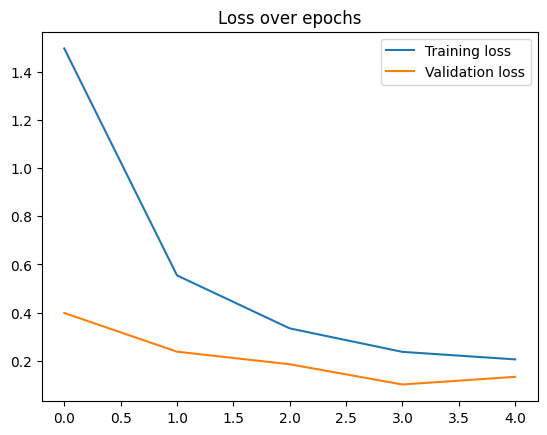

In [36]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

### Example Walkthrough

# Imagine you're teaching a student to solve math problems:

1. **Epoch**: Each time the student completes all the problems in a workbook, that’s one epoch.
2. **Steps**: Each problem solved in the workbook is a step.
3. **Gradients**: After solving a problem, you see which parts they got wrong and give feedback on how to improve.
4. **Weights**: The student’s method or understanding that you adjust based on feedback.
5. **Loss**: The difference between the student’s answers and the correct answers.
6. **`loss.backward()`**: Determines how to adjust the student’s study approach based on their mistakes.
7. **Optimizer**: Implements the adjustments in the student’s study plan based on feedback.
8. **`model.train()` and Dropout**: When training, sometimes you test the student with fewer resources to make them adaptable, which is similar to dropout.

By repeating this process over multiple epochs, the model (or student) gradually improves its performance and becomes better at predicting or solving problems.

TODO - Find the Accurancy

In [39]:
test_load_everything = DataLoader(test_dataset, batch_size=265, shuffle=False) # load full test data ,sizeof test_data or len = 265

In [41]:
with torch.no_grad():
  correct = 0
  for image, label in test_load_everything:
    image, label = image.to(device), label.to(device)  # Ensure tensors are on the correct device
    y_val = model(image)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == label).sum()

In [42]:
# Did for corrrect
correct.item()/len(test_dataset)*100

96.22641509433963

**OR ACCURANCY MEASURE FUNCTION**

In [43]:
def calculate_accuracy(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# After training, calculate accuracy on the test set

test_accuracy = calculate_accuracy(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy}%")

Test Accuracy: 96.22641509433963%


**Bonus: Evaluating the Results**

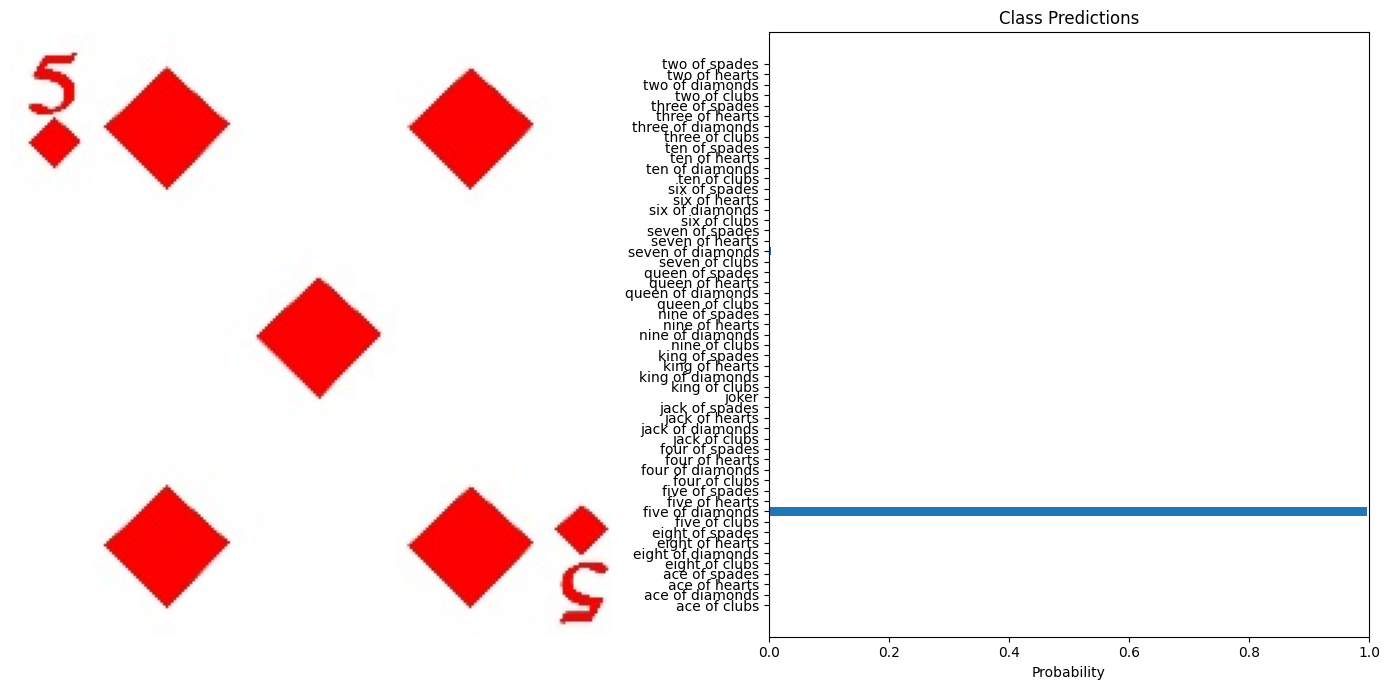

In [44]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
test_image = "/content/playing_card_dataset/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_predictions(original_image, probabilities, class_names)

### 1. **Epoch**

- **What is an Epoch?**  
  Think of an epoch like a complete round of training on your entire dataset. If you have a dataset of 1000 images and you train your model for 1 epoch, it means the model has seen all 1000 images once.

- **Why Multiple Epochs?**  
  One pass (epoch) through the data is usually not enough for the model to learn effectively. Multiple epochs mean the model sees the data several times, which helps it learn better and improve performance.

### 2. **Steps**

- **What is a Step?**  
  A step corresponds to a single update of the model's parameters. During each step, you process a batch of data, compute the loss, calculate gradients, and then update the model’s weights.

- **Example**:  
  Suppose you have a dataset of 1000 images and you divide this into batches of 100 images. For each batch, the model will go through one step. If you train for 1 epoch, you’ll have 10 steps (1000 images / 100 images per batch).

### 3. **Gradients**

- **What are Gradients?**  
  Gradients are a measure of how much a model's parameters (weights) should change to reduce the loss. They tell the optimizer in which direction to adjust the weights to make the model better at predicting.

- **Example**:  
  Imagine you’re at the top of a hill (high loss) and you want to go down to a valley (low loss). The gradient tells you which direction to walk to descend the hill. In the context of machine learning, gradients guide how the model’s weights should be adjusted to reduce the error in predictions.

### 4. **Weights and Parameters**

- **Weights and Parameters**:  
  Weights are the parameters of the model that are adjusted during training. They determine how input data is transformed into predictions.

- **Example**:  
  In a simple linear model, weights determine how much influence each feature (input) has on the output prediction. If you have a model predicting house prices, weights might represent how much size or location influences the price.

### 5. **Loss Calculation**

- **What is Loss?**  
  Loss is a measure of how far the model’s predictions are from the actual values. Lower loss means better performance.

- **Loss Calculation and `loss.backward()`:**  
  - **`loss.backward()`**: This computes the gradients of the loss function with respect to the model parameters. It’s like figuring out how to adjust the model’s weights to improve its predictions.
  - **Does it Update the Model?**: No, `loss.backward()` doesn’t update the model. It calculates how the weights should be updated. The actual update happens with `optimizer.step()`.

### 6. **Optimizer**

- **What is an Optimizer?**  
  An optimizer adjusts the model’s weights based on the gradients computed by `loss.backward()`.

- **Example**:  
  If the gradient suggests that increasing a weight will decrease the loss, the optimizer will adjust the weight in that direction.

### 7. **`model.train()` and Dropout**

- **`model.train()`**:  
  This sets the model to training mode, enabling features like dropout, which are useful only during training.

- **What is Dropout?**  
  Dropout is a technique to prevent overfitting by randomly setting a fraction of input units to zero during training. This helps the model to not rely too much on any single feature and improves its generalization to new data.

- **Example**:  
  Imagine you’re training a student who knows all the answers to a test. If you make them solve problems with some questions hidden, they’ll learn better and become more adaptable. Dropout works similarly by hiding some neurons during training.

### Putting It All Together

1. **Epoch**: One complete run through the entire training dataset.
2. **Steps**: Individual updates of the model's parameters during training, one per batch of data.
3. **Gradients**: Values that tell us how to adjust the model’s weights to reduce the error.
4. **Weights/Parameters**: The model’s adjustable settings that influence how it makes predictions.
5. **Loss Calculation**: Measures how far off the model’s predictions are from the actual values.
6. **`loss.backward()`**: Computes the necessary gradients to update the model's weights.
7. **Optimizer**: Updates the model’s weights using the gradients computed.
8. **`model.train()` and Dropout**: Prepares the model for training by enabling dropout, which helps prevent overfitting.
